In [1]:
import os
import tarfile
import pandas as pd
cwd = os.getcwd()
print(cwd)

C:\Users\USER\Stanley Cup Winner Predictor


In [2]:
NHL_SEASON_DATA_PATH = 'nhl_season_data'

def load_nhl_data(nhl_season_data_path=NHL_SEASON_DATA_PATH):
    csv_path = os.path.join(nhl_season_data_path, 'teamHistoricalStats.csv')
    return pd.read_csv(csv_path, encoding = "ISO-8859-1")

def load_current_nhl_data(nhl_season_data_path=NHL_SEASON_DATA_PATH):
    csv_path = os.path.join(nhl_season_data_path, 'teamCurrentStats.csv')
    return pd.read_csv(csv_path, encoding = "ISO-8859-1")

In [3]:
nhl_season_data = load_nhl_data()
X = load_current_nhl_data()

In [4]:
nhl_season_data.head()

,TeamID,Team,SeasonCropped,P%,GF/GP,GA/GP,Net PP%,Net PK%,Shots/GP,SA/GP,WinStanleyCup
0,2,Detroit Red Wings,1996,0.799,3.96,2.21,19.3,92.8,32.3,24.2,0
1,3,Montréal Canadiens,1978,0.806,4.49,2.29,31.4,85.3,32.8,25.9,1
2,4,Tampa Bay Lightning,2019,0.780,3.89,2.70,27.1,89.5,32.0,32.1,0
3,6,Detroit Red Wings,2006,0.756,3.67,2.51,20.0,87.0,34.1,26.6,0
4,8,Washington Capitals,2010,0.738,3.82,2.77,22.7,80.1,32.8,30.9,0


In [5]:
nhl_season_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TeamID         1079 non-null   int64  
 1   Team           1079 non-null   object 
 2   SeasonCropped  1079 non-null   int64  
 3   P%             1079 non-null   float64
 4   GF/GP          1079 non-null   float64
 5   GA/GP          1079 non-null   float64
 6   Net PP%        1079 non-null   float64
 7   Net PK%        1079 non-null   float64
 8   Shots/GP       1079 non-null   float64
 9   SA/GP          1079 non-null   float64
 10  WinStanleyCup  1079 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 92.9+ KB


In [6]:
nhl_season_data['Team'].value_counts()

Los Angeles Kings        43
Chicago Blackhawks       43
Montréal Canadiens       43
Toronto Maple Leafs      43
Washington Capitals      42
Philadelphia Flyers      42
Buffalo Sabres           42
St. Louis Blues          42
Boston Bruins            42
Vancouver Canucks        42
Pittsburgh Penguins      41
Detroit Red Wings        41
New York Rangers         41
New York Islanders       41
Edmonton Oilers          39
Calgary Flames           39
New Jersey Devils        37
San Jose Sharks          27
Tampa Bay Lightning      26
Dallas Stars             26
Anaheim Ducks            25
Florida Panthers         25
Winnipeg Jets            25
Ottawa Senators          24
Colorado Avalanche       24
Carolina Hurricanes      22
Nashville Predators      21
Columbus Blue Jackets    19
Minnesota Wild           19
Hartford Whalers         18
Phoenix Coyotes          17
Quebec Nordiques         15
Minnesota North Stars    15
Atlanta Thrashers        11
Arizona Coyotes           6
Colorado Rockies    

In [7]:
nhl_season_data.describe()

,TeamID,SeasonCropped,P%,GF/GP,GA/GP,Net PP%,Net PK%,Shots/GP,SA/GP,WinStanleyCup
count,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000
mean,639.615385,2000.859129,0.530673,3.081075,3.064374,16.322335,83.789249,29.812512,29.767006,0.039852
std,391.467352,12.236559,0.098850,0.580846,0.590817,3.644373,3.703413,2.165448,2.584937,0.195701
min,2.000000,1978.000000,0.238000,1.830000,1.890000,4.800000,70.200000,23.700000,22.100000,0.000000
25%,305.500000,1991.000000,0.463000,2.650000,2.615000,13.800000,81.600000,28.400000,28.150000,0.000000
50%,608.000000,2002.000000,0.538000,2.950000,2.960000,16.100000,84.100000,29.900000,29.800000,0.000000
75%,955.000000,2011.500000,0.604000,3.455000,3.410000,18.800000,86.300000,31.300000,31.600000,0.000000
max,1475.000000,2020.000000,0.806000,5.580000,5.190000,31.400000,95.400000,36.800000,37.000000,1.000000


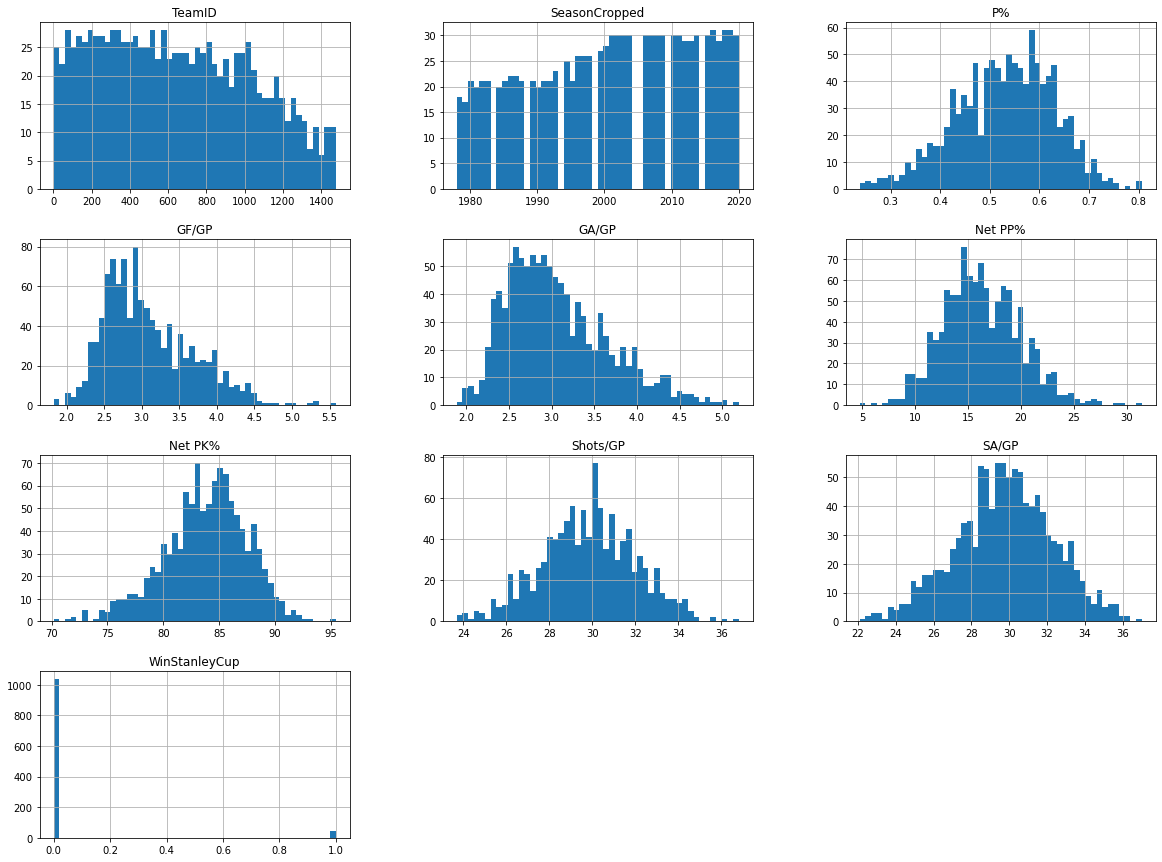

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
nhl_season_data.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
corr_matrix = nhl_season_data.corr()

In [10]:
corr_matrix

,TeamID,SeasonCropped,P%,GF/GP,GA/GP,Net PP%,Net PK%,Shots/GP,SA/GP,WinStanleyCup
TeamID,1.000000,-0.189768,-0.886769,-0.268869,0.539829,-0.342732,-0.453312,-0.361202,0.374681,-0.211263
SeasonCropped,-0.189768,1.000000,0.228139,-0.630048,-0.598221,-0.265640,0.238578,0.019524,0.032245,-0.035616
P%,-0.886769,0.228139,1.000000,0.300816,-0.613982,0.411846,0.491758,0.403134,-0.419401,0.242067
GF/GP,-0.268869,-0.630048,0.300816,1.000000,0.500810,0.643787,-0.154501,0.461594,0.074178,0.172629
GA/GP,0.539829,-0.598221,-0.613982,0.500810,1.000000,0.144997,-0.656472,0.050421,0.536598,-0.094575
Net PP%,-0.342732,-0.265640,0.411846,0.643787,0.144997,1.000000,-0.114586,0.406523,-0.007561,0.135841
Net PK%,-0.453312,0.238578,0.491758,-0.154501,-0.656472,-0.114586,1.000000,-0.019156,-0.419132,0.130376
Shots/GP,-0.361202,0.019524,0.403134,0.461594,0.050421,0.406523,-0.019156,1.000000,-0.013409,0.144170
SA/GP,0.374681,0.032245,-0.419401,0.074178,0.536598,-0.007561,-0.419132,-0.013409,1.000000,-0.109256
WinStanleyCup,-0.211263,-0.035616,0.242067,0.172629,-0.094575,0.135841,0.130376,0.144170,-0.109256,1.000000


In [11]:
nhl_season_data_labels = nhl_season_data['WinStanleyCup'].copy()
nhl_season_data = nhl_season_data.drop('WinStanleyCup', axis=1)

In [12]:
nhl_season_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TeamID         1079 non-null   int64  
 1   Team           1079 non-null   object 
 2   SeasonCropped  1079 non-null   int64  
 3   P%             1079 non-null   float64
 4   GF/GP          1079 non-null   float64
 5   GA/GP          1079 non-null   float64
 6   Net PP%        1079 non-null   float64
 7   Net PK%        1079 non-null   float64
 8   Shots/GP       1079 non-null   float64
 9   SA/GP          1079 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 84.4+ KB


In [13]:

nhl_season_data = nhl_season_data.drop('TeamID', axis=1)
nhl_season_data = nhl_season_data.drop('Team', axis=1)
nhl_season_data = nhl_season_data.drop('SeasonCropped', axis=1)

In [14]:
nhl_season_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   P%        1079 non-null   float64
 1   GF/GP     1079 non-null   float64
 2   GA/GP     1079 non-null   float64
 3   Net PP%   1079 non-null   float64
 4   Net PK%   1079 non-null   float64
 5   Shots/GP  1079 non-null   float64
 6   SA/GP     1079 non-null   float64
dtypes: float64(7)
memory usage: 59.1 KB


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_nhl_season_data = scaler.fit_transform(nhl_season_data)
#now the data is a numpy array and has no column headers

In [16]:
print(scaled_nhl_season_data)

[[0.98767606 0.568      0.0969697  ... 0.8968254  0.65648855 0.1409396 ]
 [1.         0.70933333 0.12121212 ... 0.59920635 0.69465649 0.25503356]
 [0.95422535 0.54933333 0.24545455 ... 0.76587302 0.63358779 0.67114094]
 ...
 [0.29577465 0.384      0.54545455 ... 0.62698413 0.46564885 0.67785235]
 [0.29577465 0.14666667 0.37575758 ... 0.46825397 0.44274809 0.62416107]
 [0.         0.064      0.58484848 ... 0.46428571 0.16030534 0.59731544]]


In [17]:
from sklearn.svm import SVC
clf = SVC(C=1, gamma=0.001, kernel='rbf', probability=True)
clf.fit(nhl_season_data, nhl_season_data_labels)

SVC(C=1, gamma=0.001, probability=True)

In [20]:
import numpy as np

clf.predict(X)
probs = clf.predict_proba(X)
print(probs)

[[0.94210386 0.05789614]
 [0.93270297 0.06729703]
 [0.93986529 0.06013471]
 [0.94447975 0.05552025]
 [0.94730884 0.05269116]
 [0.93666237 0.06333763]
 [0.95885864 0.04114136]
 [0.93586556 0.06413444]
 [0.95304925 0.04695075]
 [0.95105151 0.04894849]
 [0.96024938 0.03975062]
 [0.94866744 0.05133256]
 [0.95484892 0.04515108]
 [0.95021904 0.04978096]
 [0.95801625 0.04198375]
 [0.95365315 0.04634685]
 [0.95042868 0.04957132]
 [0.93868628 0.06131372]
 [0.98645153 0.01354847]
 [0.96551656 0.03448344]
 [0.95445598 0.04554402]
 [0.95494294 0.04505706]
 [0.9697442  0.0302558 ]
 [0.96678763 0.03321237]
 [0.97438776 0.02561224]
 [0.9602019  0.0397981 ]
 [0.99354532 0.00645468]
 [0.96692235 0.03307765]
 [0.99295133 0.00704867]
 [0.99825332 0.00174668]
 [0.96566722 0.03433278]]


In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import precision_score, recall_score

skfolds = StratifiedKFold(n_splits=5)

for train_index, test_index in skfolds.split(nhl_season_data, nhl_season_data_labels):
    clone_clf = clone(clf)
    X_train_folds = nhl_season_data[train_index]
    y_train_folds = (nhl_season_data_labels[train_index])
    X_test_fold = nhl_season_data[test_index]
    y_test_fold = (nhl_season_data_labels[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))
    print(recall_score(y_test_fold, y_pred))

KeyError: "None of [Int64Index([  27,   38,   40,   41,   47,   58,   60,   70,   82,   99,\n            ...\n            1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078],\n           dtype='int64', length=863)] are in the [columns]"

In [22]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, nhl_season_data, nhl_season_data_labels, cv=10, scoring="accuracy")

array([0.96296296, 0.96296296, 0.96296296, 0.96296296, 0.96296296,
       0.96296296, 0.9537037 , 0.9537037 , 0.9537037 , 0.96261682])

In [23]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(clf, nhl_season_data, nhl_season_data_labels, cv=10)

In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(nhl_season_data_labels, y_train_pred)

array([[1036,    0],
       [  43,    0]], dtype=int64)

In [23]:
from sklearn.model_selection import GridSearchCV
parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-2],
                     'C': [1, 1000, 10000, 100000]},
                    {'kernel': ['linear'], 'C': [1, 1000, 10000, 100000]}]

SVC = GridSearchCV(estimator=SVC(), param_grid=parameters)

In [24]:
SVC.fit(scaled_nhl_season_data, nhl_season_data_labels)
print(SVC.best_params_)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [33]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(scaled_nhl_season_data, nhl_season_data_labels)

LogisticRegression()

In [38]:
log_reg.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [39]:
log_reg.predict_proba(X)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])